<a href="https://colab.research.google.com/github/worldofaryavart/colab_notebooks/blob/colabnotebook/regressionusingtf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
np.set_printoptions(precision = 3, suppress = True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names = column_names,
                          na_values = '?', comment = '\t',
                          sep = ' ', skipinitialspace = True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

<ipython-input-10-421da2625ee2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [ ]:
dataset = pd.get_dummies(dataset, columns = ['Origin'], prefix = '', prefix_sep = '')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [ ]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

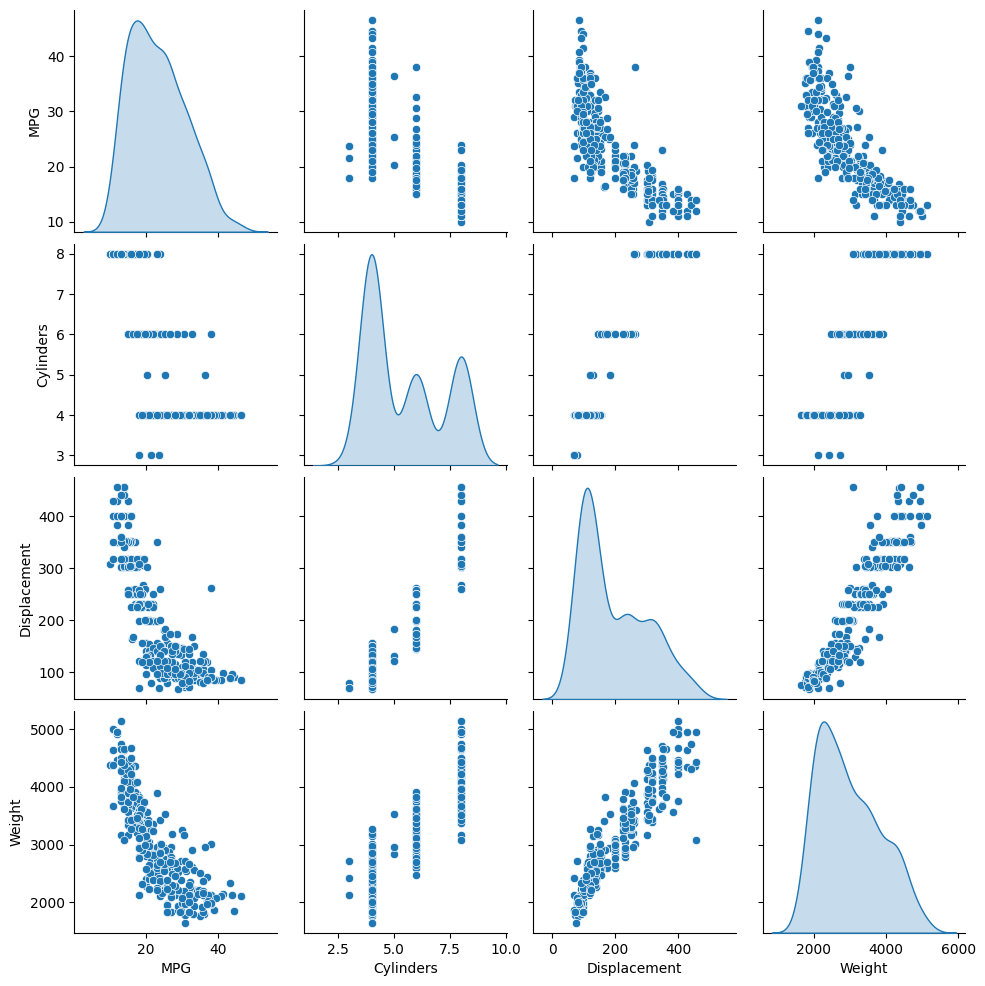

In [ ]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement', 'Weight']], diag_kind = 'kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


In [ ]:
normalizer = tf.keras.layers.Normalization(axis = -1)

In [ ]:
print(train_features.dtypes)

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe             bool
Japan              bool
USA                bool
dtype: object


In [ ]:
train_features = train_features.astype(np.float64)
test_features = test_features.astype(np.float64)

In [ ]:
print(train_features.dtypes)

Cylinders       float64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year      float64
Europe          float64
Japan           float64
USA             float64
dtype: object


In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision = 2, suppress = True):
  print("First Example:", first)
  print()
  print('Normalized: ', normalizer(first).numpy())

First Example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized:  [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [ ]:
train_features['Horsepower']

146     75.0
282     88.0
69     160.0
378     63.0
331     67.0
       ...  
281     85.0
229    180.0
150     93.0
145     61.0
182     86.0
Name: Horsepower, Length: 314, dtype: float64

In [ ]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis = None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units = 1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 150ms/step


array([[-0.307],
       [-0.173],
       [ 0.566],
       [-0.43 ],
       [-0.389],
       [-0.153],
       [-0.461],
       [-0.389],
       [-0.101],
       [-0.173]], dtype=float32)

In [ ]:
horsepower_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_absolute_error'
)

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2
)

CPU times: user 6.37 s, sys: 197 ms, total: 6.56 s
Wall time: 12.4 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802270,4.201685,95
96,3.802899,4.198819,96
97,3.803398,4.183752,97
98,3.808019,4.202946,98
99,3.806289,4.172507,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'],label = 'val_loss')
  plt.ylim([0,10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

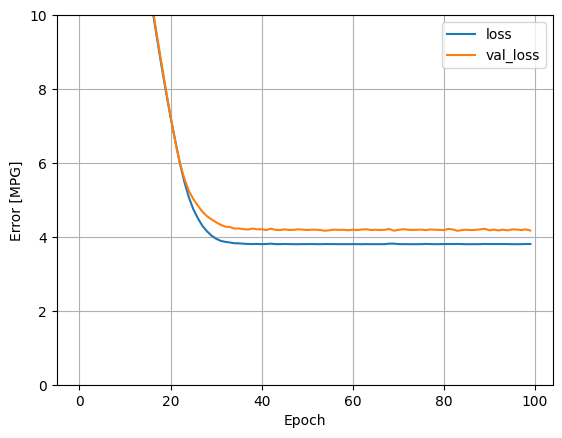

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose = 0
)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 4ms/step


In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

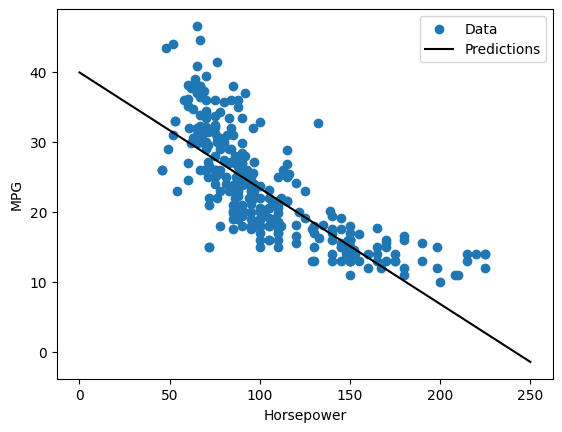

In [ ]:
plot_horsepower(x, y)

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 52ms/step


array([[-0.129],
       [ 0.43 ],
       [ 0.204],
       [ 0.905],
       [ 1.145],
       [ 0.369],
       [ 1.1  ],
       [-2.356],
       [-0.067],
       [ 0.289]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.276],
       [-0.194],
       [ 0.497],
       [-0.239],
       [-0.064],
       [ 0.561],
       [-0.577],
       [ 0.597],
       [ 0.455]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.1),
    loss = 'mean_absolute_error'
)

In [ ]:
linear_model.dtype

'float32'

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2
)

CPU times: user 6.35 s, sys: 161 ms, total: 6.51 s
Wall time: 8.98 s


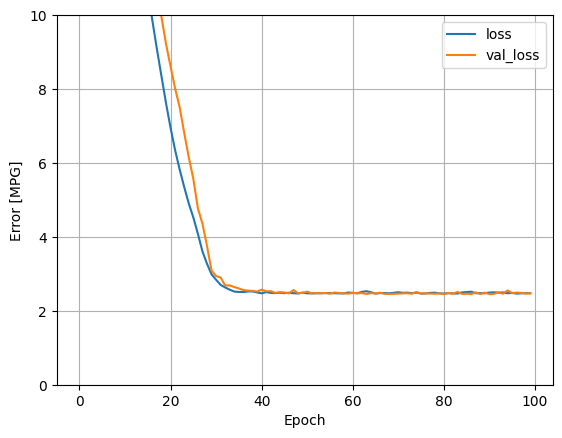

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose = 0
)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation = 'relu'),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error',
                optimizer = tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split = 0.2,
    verbose =0, epochs = 100
)

CPU times: user 7.08 s, sys: 173 ms, total: 7.26 s
Wall time: 8.89 s


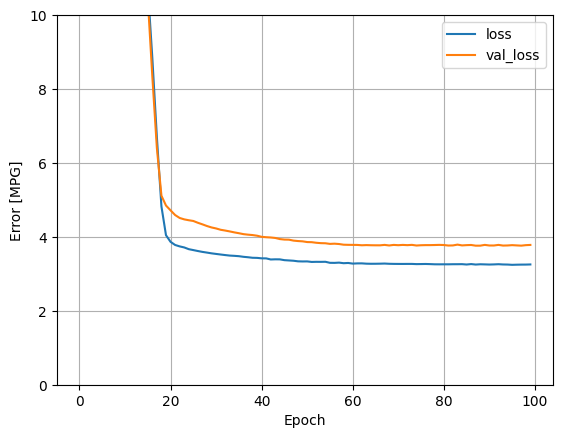

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0,250,251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


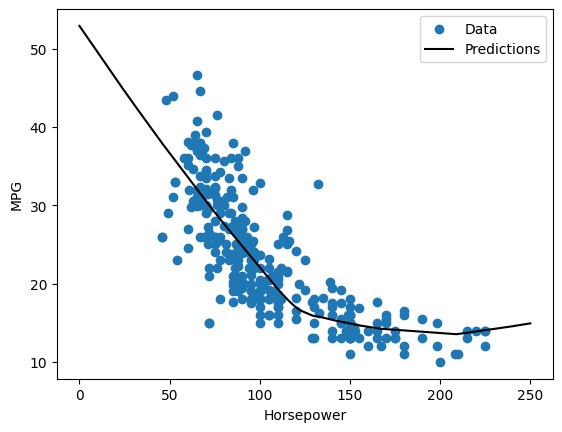

In [ ]:
plot_horsepower(x,y)

In [ ]:
test_results['dnn_horsepower_mode'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose = 0
)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history  = dnn_model.fit(
    train_features,
    train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 100
)

CPU times: user 6.13 s, sys: 222 ms, total: 6.36 s
Wall time: 10.4 s


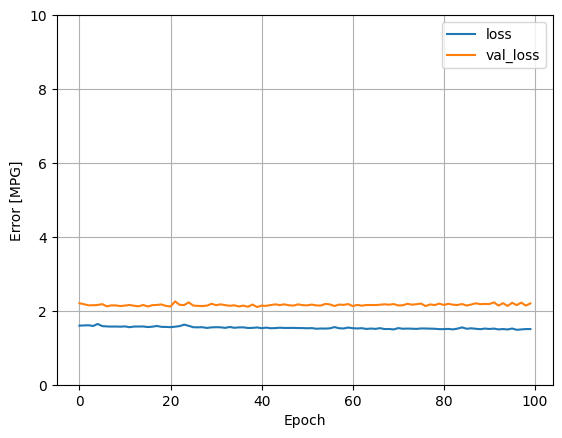

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose = 0)

In [ ]:
pd.DataFrame(test_results, index = ['Mean abosolute error [MPG]']).T

,Mean abosolute error [MPG]
horsepower_model,3.652266
linear_model,2.514955
dnn_horsepower_mode,2.887721
dnn_model,1.718972


3/3 [==============================] - 0s 5ms/step


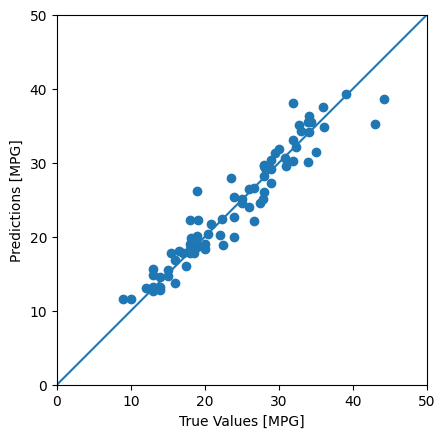

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

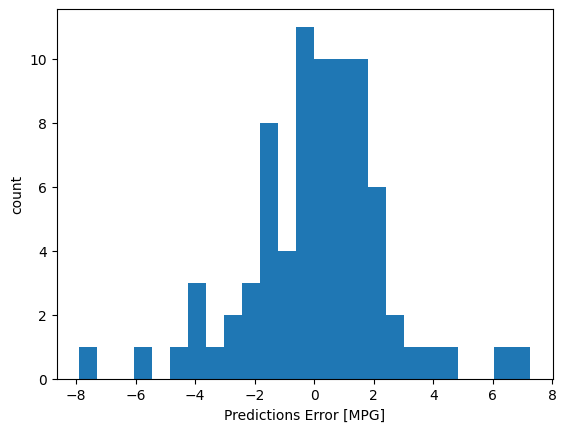

In [ ]:
error = test_predictions - test_labels
plt.hist(error,bins = 25)
plt.xlabel('Predictions Error [MPG]')
_ = plt.ylabel('count')

In [ ]:
dnn_model.save('dnn_model.keras')